 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

# Linear regression using Scikit-learn

Let's first generate some random data and try to fit a linear model to it with degree 1 - this model would be a straight line.

Shape of X before: (50,), shape of X after: (50, 1)


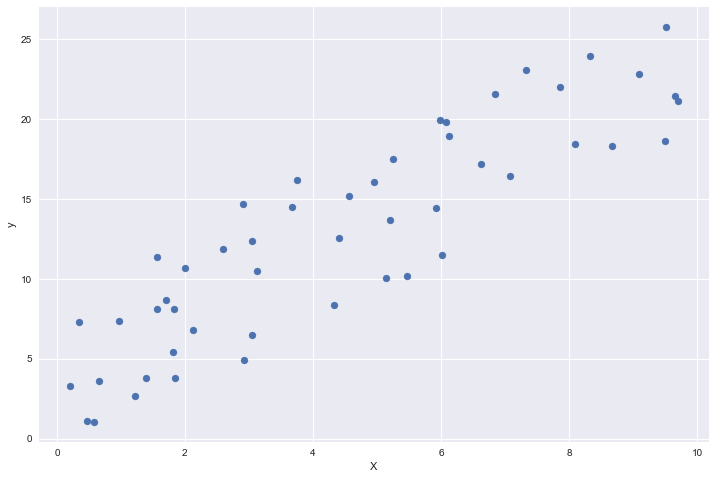

In [81]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

# Generate some data given a slope and intercept, and add some noise to it
rng = np.random.RandomState(42)
X = 10 * rng.rand(50)
variance = 10
slope = 2
intercept = -1
y = slope * X + intercept + variance * rng.rand(50)

# Plot generated data
plt.figure(figsize=(12,8))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

# Arrange the data in a feature matrix and target vector. X needs to be reshaped in a matrix, y is ok as vector
X = X.reshape((50,1))
print("Shape of X before: %s, shape of X after: %s" % (x.shape, X.shape))

In [82]:
# Instantiate the LinearRegression class, passing the hyperparameters
# fit_intercept=True is selected to tell we like to fit the y-parameter
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
print("Model:", model)

# Apply the model to data
model.fit(X, y)

# The results of the fitting are stored in parameters with trailing underscores, let's view some of them
print("Coef:", model.coef_)
print("Intercept:", model.intercept_)
print("Rank:", model.rank_)
print("Singular:", model.singular_)


Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Coef: [2.06607665]
Intercept: 3.6497242492000073
Rank: 1
Singular: [20.22182407]


Scikit-learn does not draw conclusions from the model parameters. 
Interpreting model parameters is much more a 'statistical modeling' than 'machine learning' question.
For statistical modeling you can look at Python's statsmodels package

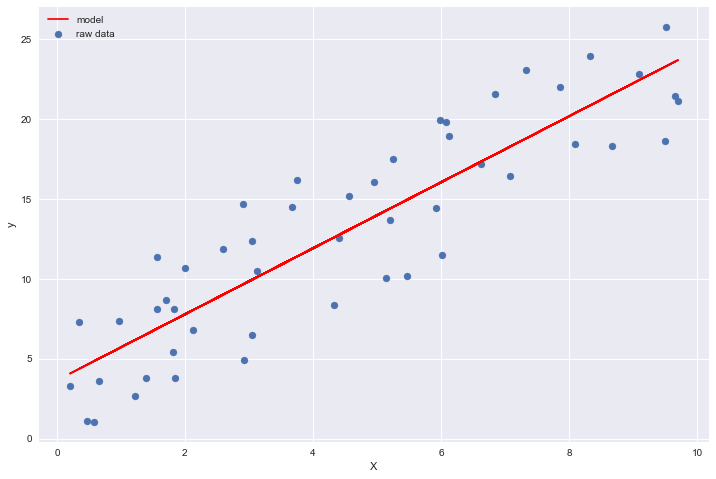

In [83]:
""" Visualise the model fitting """

# Predict labels of unknown data (first we need to generate new data).
# The fitted model is actually the prediction for new unknown samples

y_fit = model.predict(X)

# Visualise the raw data and the model fit
plt.figure(figsize=(12,8))
plt.scatter(X, y, label='raw data')
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X, y_fit, label='model', color='red')
plt.legend()

In [84]:
""" Evaluate the fitting """

# Generate new random data with the same parameters for slope, intercept and variance
rng = np.random.RandomState(43)
x_test = 10 * rng.rand(50)
y_test = slope * x_test + intercept + variance * rng.rand(50)
X_test = x_test[:, np.newaxis]  # reshape as earlier

# A 'score' measure: 
# 1 is a perfect relationship, and 0 means there is no linear relationship between X_test and y_test
print("Score:", model.score(X_test, y_test))
y_predict = model.predict(X_test)

# Calculate the mean squared error
mse = np.mean(((y_predict - y_test) ** 2) / len(y_test))
print("Mean sqared error: {0:.5f}".format(mse))

Score: 0.8364823202310163
Mean sqared error: 0.14984


# Polynomial fitting

In this part we'll fit a higher degree polynomial to more complex data.

Text(0,0.5,'y')

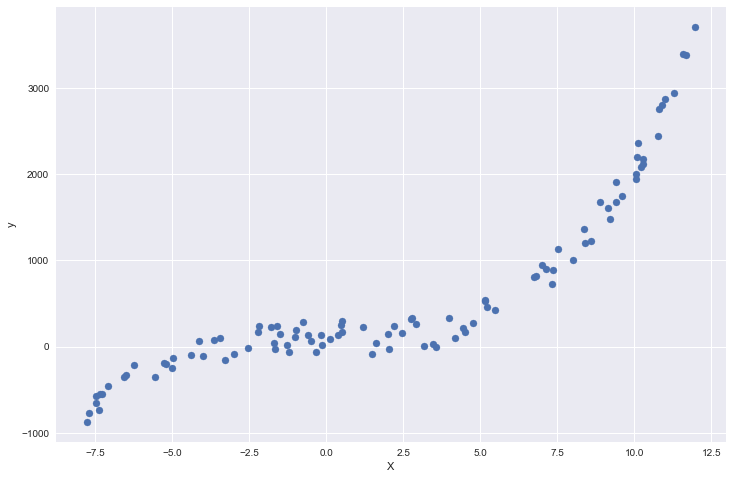

In [89]:
# Generate some random data as earlier, and visualise the data
X = 20 * (rng.rand(100)-0.4)
variance = 400
intercept = -100
X = np.sort(X, axis=0)
y = slope * X ** 3 + intercept + variance * rng.rand(100)
X = np.reshape(X, (len(X), 1))

# Plot generated data
plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

Let's try out a few different polynomial degrees to fit the data.

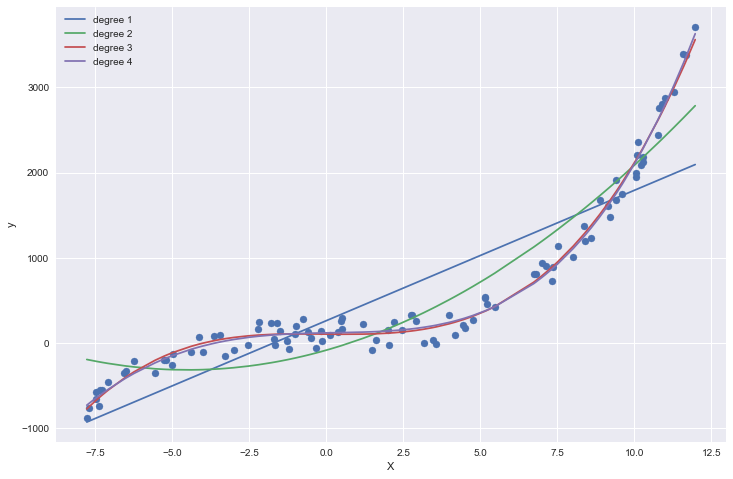

In [92]:
from sklearn.preprocessing import PolynomialFeatures
plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    
    # Use poly to expand the data at X (add the polynomial points)
    Xpoly = poly.fit_transform(X)
    le = LinearRegression()
    le.fit(Xpoly, y)
    
    plt.plot(X, le.predict(Xpoly), label='degree %d' %degree)
plt.legend()    

The previous steps could also be implemented in a pipeline as follows..

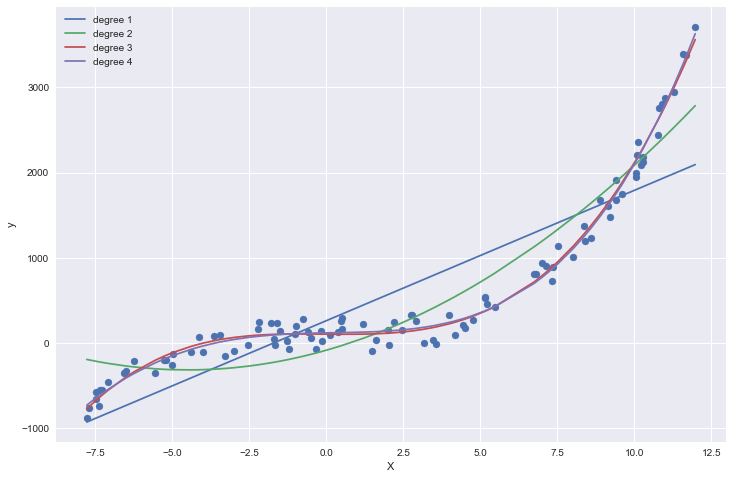

In [96]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

for degree in [1, 2, 3, 4]:
    pipe_model = make_pipeline(PolynomialFeatures(degree=degree), Ridge())
    pipe_model.fit(X, y)
    plt.plot(X, pipe_model.predict(X), label='degree %d' %degree)
    
plt.legend()